# Description du travail à faire 

# Description du jeu de données

# Résumé du travail effectué

# Importation des librairies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score, classification_report, confusion_matrix
import warnings
warnings.filterwarnings('ignore')

C:\Users\HOME\anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Analyse Exploratoire du dataset

In [2]:
df = pd.read_csv('data_trnqfinal.csv')
df.head()

,Agence de rattachement,Sexe,Age,Situation Matrimoniale,Occupation/profession,Nombres de mois de cotisation,Nombres de plans cotisés,Nombre de plans cotisés à terme,Montant de l'épargne cotisé,Nombre de transactions enregistrées,Nombre de crédits demandés,Montant de crédits demandés,Secteur d'activité économique du crédit demandé,Sous Secteur d'activité économique du crédit demandé,Nombres de crédit octroyés,Cotisation au RPC,Cautionnement signé,Revenus du Garant
0,A234,M,45.0,Marié,Commerce,2,2,1,350000,32,1,500000.0,COMMERCE,Formel,1,1.0,Oui,150000.0
1,A332,M,32.0,Marié,Commerce,2,2,1,126000,13,1,1000000.0,COMMERCE,Informel,0,1.0,Oui,120000.0
2,A348,M,51.0,Marié,Commerce,3,4,2,410000,16,1,500000.0,COMMERCE,Formel,1,1.0,Oui,200000.0
3,A344,M,33.0,Marié,Commerce,3,3,3,93000,15,1,250000.0,COMMERCE,Informel,0,1.0,Oui,150000.0
4,A344,M,44.0,Marié,Commerce,3,3,2,258000,43,1,500000.0,COMMERCE,Informel,0,1.0,Oui,156000.0


In [3]:
for i in range (len(df)):
    if df.iloc[i, 5] <= 16:
        df.iloc[i, 5] = np.nan
        

In [4]:
df.describe(include = "all")

,Agence de rattachement,Sexe,Age,Situation Matrimoniale,Occupation/profession,Nombres de mois de cotisation,Nombres de plans cotisés,Nombre de plans cotisés à terme,Montant de l'épargne cotisé,Nombre de transactions enregistrées,Nombre de crédits demandés,Montant de crédits demandés,Secteur d'activité économique du crédit demandé,Sous Secteur d'activité économique du crédit demandé,Nombres de crédit octroyés,Cotisation au RPC,Cautionnement signé,Revenus du Garant
count,4957,4957,4957.000000,4957,4957,3670.000000,4957.000000,4957.000000,4.957000e+03,4957.000000,4957.000000,4.957000e+03,4957,4957,4957.000000,4957.000000,4957,4.957000e+03
unique,67,2,NaN,5,10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2,2,NaN,NaN,2,NaN
top,A344,F,NaN,Marié,Commerce,NaN,NaN,NaN,NaN,NaN,NaN,NaN,COMMERCE,Informel,NaN,NaN,Non,NaN
freq,217,2820,NaN,4100,4194,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4956,3662,NaN,NaN,2560,NaN
mean,NaN,NaN,38.385314,NaN,NaN,32.789101,29.950978,20.034295,1.630411e+06,291.250958,2.042566,8.787779e+05,NaN,NaN,1.282025,0.926441,NaN,2.056880e+05
std,NaN,NaN,9.612299,NaN,NaN,8.611932,15.517201,14.548992,2.007272e+06,220.917264,1.119028,7.538119e+05,NaN,NaN,1.102837,0.238891,NaN,2.025327e+06
min,NaN,NaN,17.000000,NaN,NaN,17.000000,1.000000,0.000000,1.000000e+04,1.000000,1.000000,1.000000e+03,NaN,NaN,0.000000,0.000000,NaN,0.000000e+00
25%,NaN,NaN,31.000000,NaN,NaN,26.000000,17.000000,8.000000,5.060000e+05,110.000000,1.000000,3.300000e+05,NaN,NaN,0.000000,1.000000,NaN,7.000000e+04
50%,NaN,NaN,37.000000,NaN,NaN,34.000000,31.000000,17.000000,1.077800e+06,239.000000,2.000000,6.000000e+05,NaN,NaN,1.000000,1.000000,NaN,1.000000e+05
75%,NaN,NaN,44.000000,NaN,NaN,39.000000,40.000000,30.000000,2.071000e+06,439.000000,3.000000,1.150000e+06,NaN,NaN,2.000000,1.000000,NaN,2.000000e+05


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4957 entries, 0 to 4956
Data columns (total 18 columns):
 #   Column                                                Non-Null Count  Dtype  
---  ------                                                --------------  -----  
 0   Agence de rattachement                                4957 non-null   object 
 1   Sexe                                                  4957 non-null   object 
 2   Age                                                   4957 non-null   float64
 3   Situation Matrimoniale                                4957 non-null   object 
 4   Occupation/profession                                 4957 non-null   object 
 5   Nombres de mois de cotisation                         3670 non-null   float64
 6   Nombres de plans cotisés                              4957 non-null   int64  
 7   Nombre de plans cotisés à terme                       4957 non-null   int64  
 8   Montant de l'épargne cotisé                           4957

In [6]:
numeric_features = list(df.select_dtypes("float64").columns)
categorical_features = list(df.select_dtypes("object").columns)

print(f'Variables numériques :\n{numeric_features}\n\nVariables catégorielles:\n{categorical_features}')

Variables numériques :
['Age', 'Nombres de mois de cotisation', 'Montant de crédits demandés', 'Cotisation au RPC', 'Revenus du Garant']

Variables catégorielles:
['Agence de rattachement', 'Sexe ', 'Situation Matrimoniale', 'Occupation/profession', "Secteur d'activité économique du crédit demandé", "Sous Secteur d'activité économique du crédit demandé", 'Cautionnement signé']


In [7]:
Variables_numériques = ['Nombres de mois de cotisation', 'Nombres de plans cotisés', 'Nombre de plans cotisés à terme', "Montant de l'épargne cotisé", 'Nombre de transactions enregistrées', 'Nombre de crédits demandés', 'Nombres de crédit octroyés', 'Montant de crédit accordé', 'Durée moyenne de remboursement', 'Nombre de crédits octroyés', 'Nombre de crédit remboursés', "Emprunt en cours (dispose t il d'emprunts en cours)", "Nombres d'années passées à cette addresse ", 'Age', 'Montant de crédits demandés', 'Cotisation au RPC', 'Revenus du Garant']
Variables_catégorielles = ['ID Client', 'Date de création', 'Agence de rattachement', 'Sexe ', 'Situation Matrimoniale', 'Occupation/profession', 'Type de compte', "Secteur d'activité économique du crédit demandé", "Sous Secteur d'activité économique du crédit demandé", 'Cautionnement signé']

# Histogramme des variables numériques


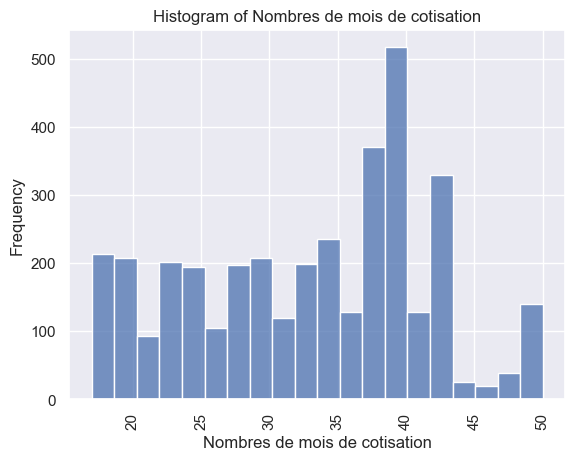

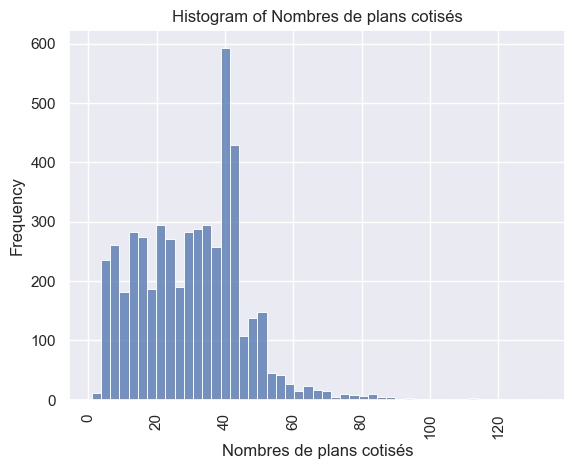

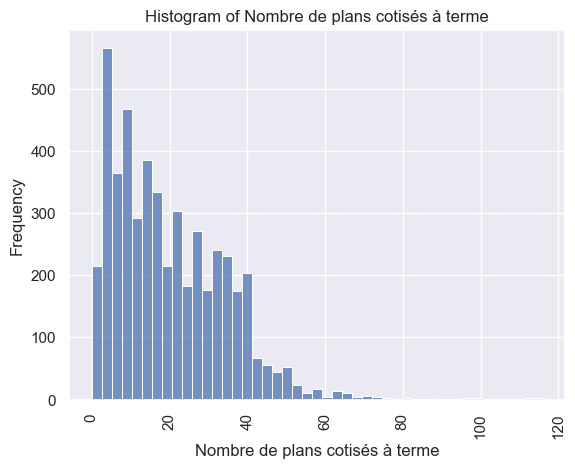

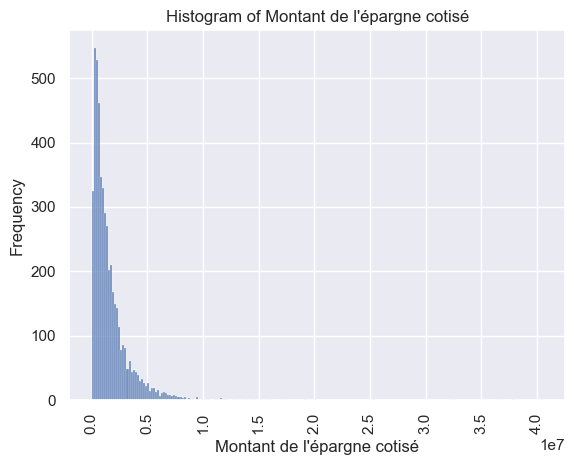

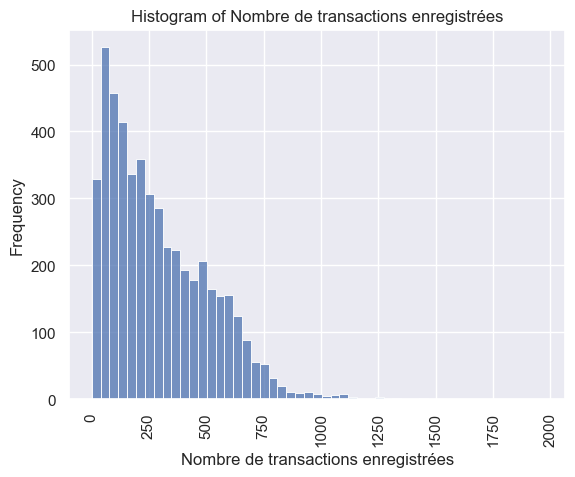

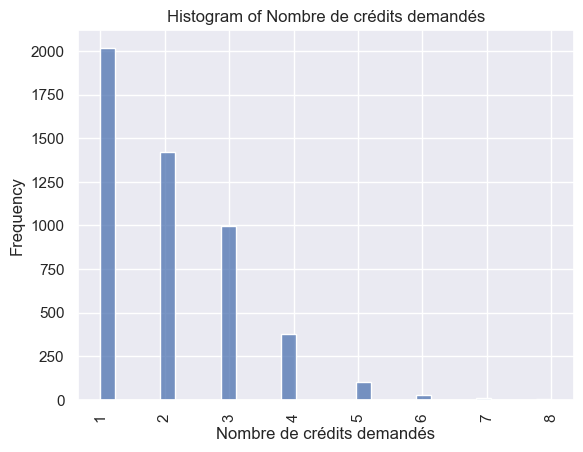

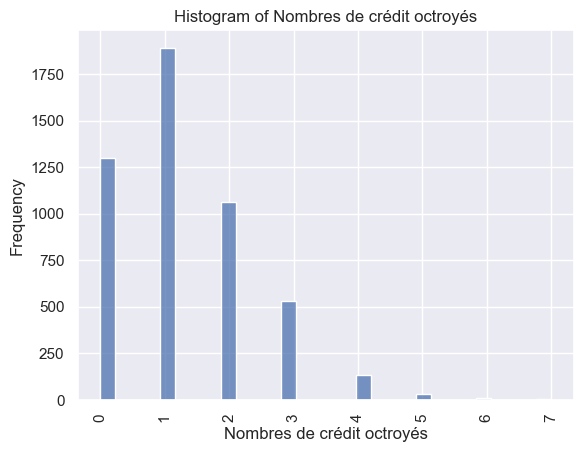

KeyError: 'Montant de crédit accordé'

In [8]:
for feature in Variables_numériques:
    sns.histplot(df[feature])
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('Frequency')
    plt.title(f'Histogram of {feature}')
    plt.show()

# Tracé des diagrammes en barre des variables catégorielles

In [9]:
#segmentation profession
commerce_keywords = ['provenderie','commrce','charbon','water','operateur','commet','commet','comercant','bacterie','reven','revendeise','ustancine','commee','commmerce','commer','commen','financi','commmercant','revndeuse','alimentation ','caommercant','compercante','commmmerce','quincailleri','quincailerie','porter','stok','quincallerie','fabrication','fabrication','eau','productrice','commere','transformatrice','transformateur','transformation','recendeur','commercr','produits','revenduse','revendruse','poissonerie','commercilisation','vendeur','commercialisation','achat','quincaillerie','commerce','poissonnerie','commerce','revendeuse','revendeur', 'commer\u00e7ante', 'commer\u00e7ant', 'marchande','commetce', 'commerciale', 'commercant', 'marchand', 'commercante', 'divers', 'commercial', 'commercialisation', 'commer\u00c7ant', 'revendeurs', 'revente', 'vendeuse', 'commence', 'comerce', 'revendeur','boutique','poisonnerie', 'commer\u00e7ants', 'revendeusr', 'commer\u00e7antes', 'condiments', 'cmmerce', 'commer\u00e7ant', 'pi\u00e8ces d\u00e9tach\u00e9es', 'commer\u00e7ant', 'gros', 'détail','gaz','divers', 'fruit', 'fruits', 'vente','commer\u00e7ant','commer\u00e7ant']
administration_keywords = ['rant','forestier','rinaire','gb','racoleur','cnsr','receveur','direction','garde','militaire','infirmi','service','prestation','prive','delegue','pharmacien','dg','financier','hoteliere','professeur','clinique','comptable','juriste','veterinaire','chef','echographiste','gestionnaire','immobilier','administration','privee','agent', 'douane','enseignant']
couture_keywords = ['coituri','couturi','broteur','coututier','brodeur','styliste','couturi\u00e8re', 'couturiere', 'couture', 'tailleur', 'mercerie', 'couturier', 'couturi\u00e8re']
beauté_keywords = ['cosm','estheticienne','estheticienne','bijoutier','beauté','coiffeuse', 'coiffure','coiffeur', 'cosm\u00e9tologie ']
restauration_keywords = ['menueu','tissi','menuer','bouch','pecheur','agriculteurs','leveur','riz','riat','boulang','tisserie','caf','cafetaria','moulin','meulier','yaourt','zomonnon','traiteur','cusiniere','eleveur','caffeteria','elevage','boulangier','tisserande','cafeteria','cafetariat','restauration','menuier','restauration','porc' , 'restauratrice',  'nourriture', 'boisson', 'meunier', 'restaurateur', 'boucher','boulanger', 'restaurant', '\u00e9leveur', 'buvette','menier', 'bar', 'p\u00e2tissi\u00e8re', 'bouchier',]
tech_reparation_keywords = ['plasticien','lectrcien','canique','ectronicien','vulga','mecano','saisie','tchnicien','panneur','lectricien','canicien','tchnicien,','vilganisateur','vircanisateur','virganisateur','frigoriste','vulganisation','vulganisation','imprimerie','vicanisateur','vulcanisation','electricite','electro-technique','plomberie','eletricien','maintenance','maintenancier','depanneur','electronicien','informatique','tech_reparation','soudure','mecanicien', 'm\u00e9canicien','technicien', '\u00c9lectricien','m\u00e9canicien','informaticien','electricien','vulcanisateur' ,'m\u00e9canicien', 'vulganisateur', 'm\u00e9canique', 'imprimeur', 'informaticien', 'd\u00e9panneur','photocopie']
artisan_keywords = ['serigraphe','souduire','fondeur','meunuisier','menuiserie','sculpteurs','scieur','meni','menisier','cle','ma','cordonnier','matelacier','costracier','tiserante','bijouteries','tapisser','matelassiers','tapisseri','ferrailleur','charpentier','art','machiniste','menuseri','carreleur','tisserante','soudeur', 'tourneur','menuisier', 'menusier','peintre', 'vitrier', 'couturi\u00c8re', 'ma\u00e7on',  'forgeron' , 'artisan', 'macon']
transport_keywords = ['conduicteur','transport','chauffeur', 'taxi', 'moto', 'zem' ]
telephonie_mobile_keywords = ['credits','téléphonie_mobile','money','momo', 'argent','gsm', 'mobile','moby']
autres_keywords = ['banigourou','yara','oui','missessinto','lokokoukoume','adjisseur ','feuille medecinal ','pco','jardinier','nag','location','decoratrice','photographie','nan','porliche','teinturerie','promoteur de salle de jeu','gerant centre de jeux','retraite','pressing','animatrice','boutche','autres','lui meme', 'entrepreneur', 'photographe', 'propre compte', 'blanchisseur','therapetie','lavageur','transitaire']

def segment_profession(profession):
    profession = profession.lower()  # Convertir en minuscules pour une recherche insensible à la casse
    if any(profession.find(keyword) != -1 for keyword in commerce_keywords):
        return 'Commerce'
    elif any(profession.find(keyword) != -1 for keyword in administration_keywords):
        return 'Administration'
    elif any(profession.find(keyword) != -1 for keyword in couture_keywords):
        return 'Couture'
    elif any(profession.find(keyword) != -1 for keyword in beauté_keywords):
        return 'Beauté'
    elif any(profession.find(keyword) != -1 for keyword in restauration_keywords): 
        return 'Restauration'
    elif any(profession.find(keyword) != -1 for keyword in tech_reparation_keywords):
        return 'Tech_reparation'
    elif any(profession.find(keyword) != -1 for keyword in artisan_keywords):
        return 'Artisan'
    elif any(profession.find(keyword) != -1 for keyword in transport_keywords):
        return 'Transport'
    elif any(profession.find(keyword) != -1 for keyword in telephonie_mobile_keywords):
        return 'Téléphonie_mobile'
    elif any(profession.find(keyword) != -1 for keyword in autres_keywords):
        return 'Autres'
    else:
        return profession
        
df.iloc[:, 7]= df.iloc[:,7].astype(str)        
df.iloc[:, 7]= df.iloc[:,7].apply(segment_profession)

In [10]:
Results = df.iloc[:, 7].value_counts()
for index, value in Results.items():
    print(f'Élément : {index}, Nombre : {value}')

Élément : 4, Nombre : 211
Élément : 7, Nombre : 186
Élément : 5, Nombre : 185
Élément : 6, Nombre : 179
Élément : 3, Nombre : 170
Élément : 9, Nombre : 163
Élément : 8, Nombre : 161
Élément : 12, Nombre : 155
Élément : 10, Nombre : 143
Élément : 11, Nombre : 137
Élément : 14, Nombre : 135
Élément : 15, Nombre : 127
Élément : 16, Nombre : 127
Élément : 13, Nombre : 124
Élément : 21, Nombre : 117
Élément : 20, Nombre : 116
Élément : 23, Nombre : 109
Élément : 17, Nombre : 105
Élément : 28, Nombre : 104
Élément : 18, Nombre : 102
Élément : 30, Nombre : 101
Élément : 25, Nombre : 99
Élément : 19, Nombre : 99
Élément : 26, Nombre : 94
Élément : 37, Nombre : 93
Élément : 39, Nombre : 85
Élément : 24, Nombre : 83
Élément : 34, Nombre : 83
Élément : 32, Nombre : 83
Élément : 38, Nombre : 82
Élément : 36, Nombre : 81
Élément : 31, Nombre : 81
Élément : 22, Nombre : 78
Élément : 0, Nombre : 77
Élément : 33, Nombre : 77
Élément : 29, Nombre : 75
Élément : 27, Nombre : 74
Élément : 2, Nombre : 74


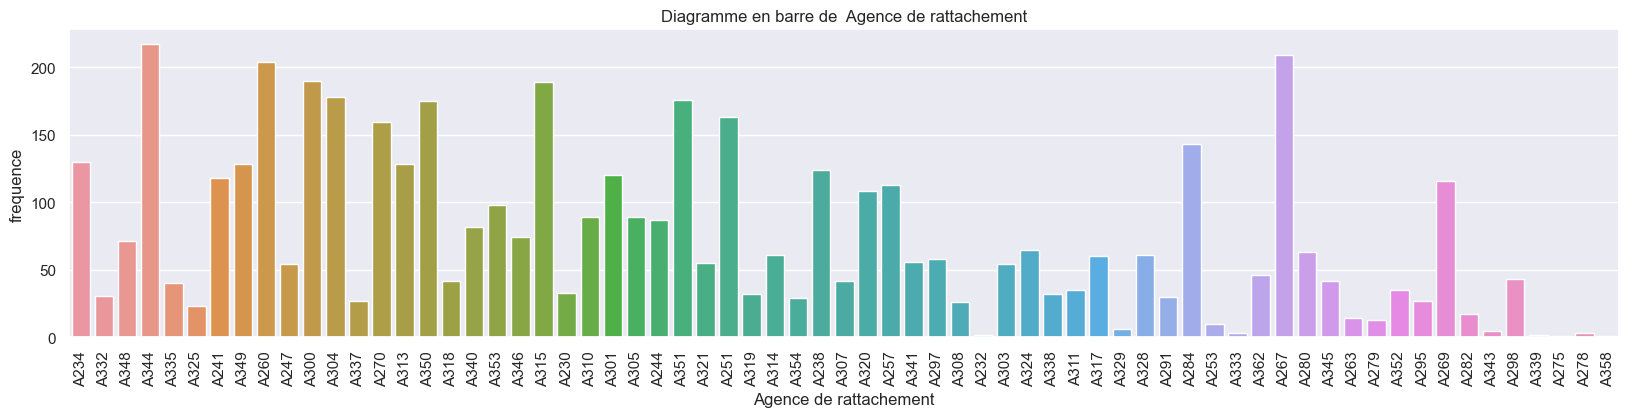

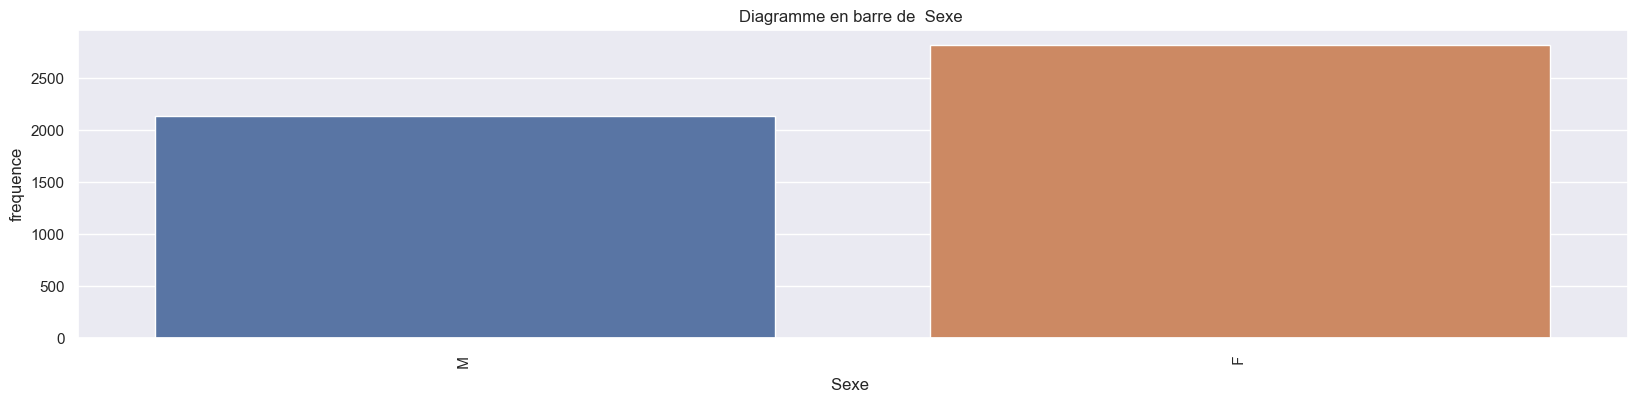

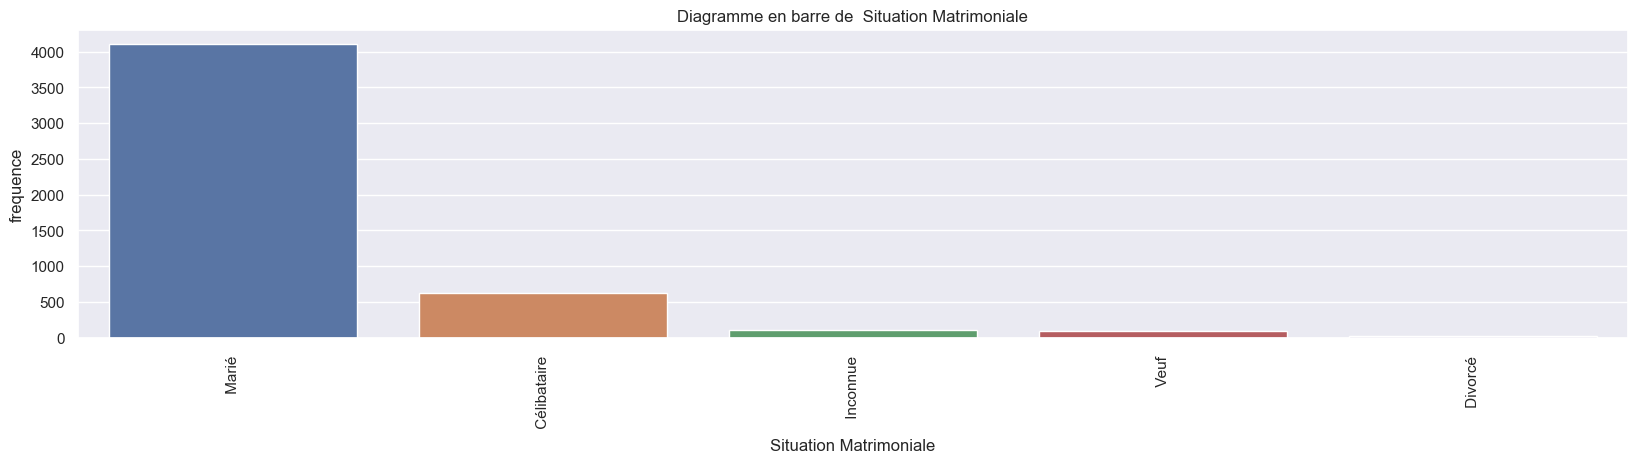

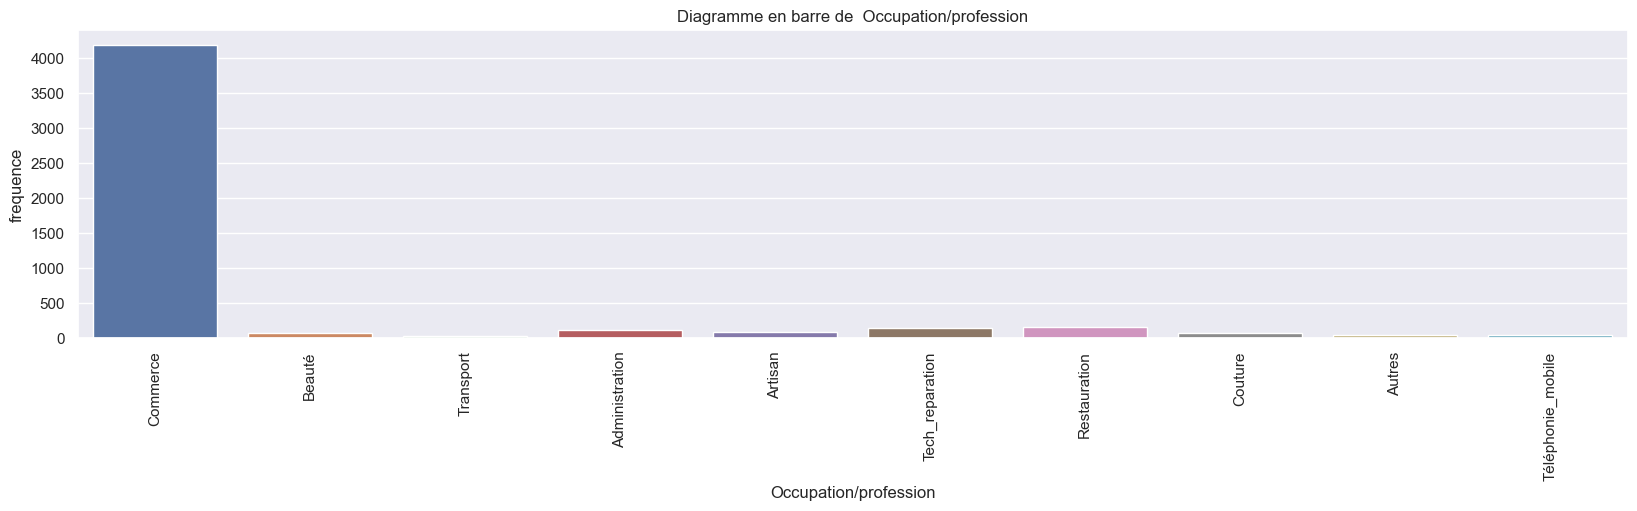

KeyError: 'Type de compte'

<Figure size 2000x400 with 0 Axes>

In [11]:
Variables_catégorielles = ['Agence de rattachement','Sexe ', 'Situation Matrimoniale', 'Occupation/profession', 'Type de compte', "Secteur d'activité économique du crédit demandé", "Sous Secteur d'activité économique du crédit demandé", 'Cautionnement signé']
for feature in Variables_catégorielles:
    plt.figure(figsize=(20,4))
    sns.countplot(df[feature])
    plt.xticks(rotation=90)
    plt.xlabel(feature)
    plt.ylabel('frequence')
    plt.title(f'Diagramme en barre de  {feature}')
    plt.show()

# Suppression des variables dont on n'a pas besoin

In [13]:
df_en = df.copy()

df_en = df_en.drop('ID Client',axis=1)
df_en = df_en.drop('Date de création',axis=1)
df_en = df_en.drop( "Nombres d'années passées à cette addresse " ,axis=1)
df_en = df_en.drop('Nombre de crédits octroyés', axis = 1)

KeyError: "['ID Client'] not found in axis"

In [14]:
df_en

,Agence de rattachement,Sexe,Age,Situation Matrimoniale,Occupation/profession,Nombres de mois de cotisation,Nombres de plans cotisés,Nombre de plans cotisés à terme,Montant de l'épargne cotisé,Nombre de transactions enregistrées,Nombre de crédits demandés,Montant de crédits demandés,Secteur d'activité économique du crédit demandé,Sous Secteur d'activité économique du crédit demandé,Nombres de crédit octroyés,Cotisation au RPC,Cautionnement signé,Revenus du Garant
0,A234,M,45.0,Marié,Commerce,NaN,2,1,350000,32,1,500000.0,COMMERCE,Formel,1,1.0,Oui,150000.0
1,A332,M,32.0,Marié,Commerce,NaN,2,1,126000,13,1,1000000.0,COMMERCE,Informel,0,1.0,Oui,120000.0
2,A348,M,51.0,Marié,Commerce,NaN,4,2,410000,16,1,500000.0,COMMERCE,Formel,1,1.0,Oui,200000.0
3,A344,M,33.0,Marié,Commerce,NaN,3,3,93000,15,1,250000.0,COMMERCE,Informel,0,1.0,Oui,150000.0
4,A344,M,44.0,Marié,Commerce,NaN,3,2,258000,43,1,500000.0,COMMERCE,Informel,0,1.0,Oui,156000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,A300,M,46.0,Marié,Commerce,50.0,52,24,2889000,469,2,1000000.0,COMMERCE,Informel,2,1.0,Non,150000.0
4953,A353,M,53.0,Marié,Commerce,50.0,51,47,1491000,321,3,850000.0,COMMERCE,Formel,3,1.0,Non,150000.0
4954,A353,F,30.0,Marié,Commerce,49.0,50,46,7297000,576,4,3000000.0,COMMERCE,Formel,4,1.0,Non,150000.0
4955,A353,F,41.0,Veuf,Beauté,48.0,64,53,8722500,952,1,1000000.0,COMMERCE,Formel,0,1.0,Oui,200000.0


In [15]:
# Enregistrement de la dataframe modifiée
df_en.to_excel('donnees_pretraitees.xlsx', index=False)

# Matrice de confusion


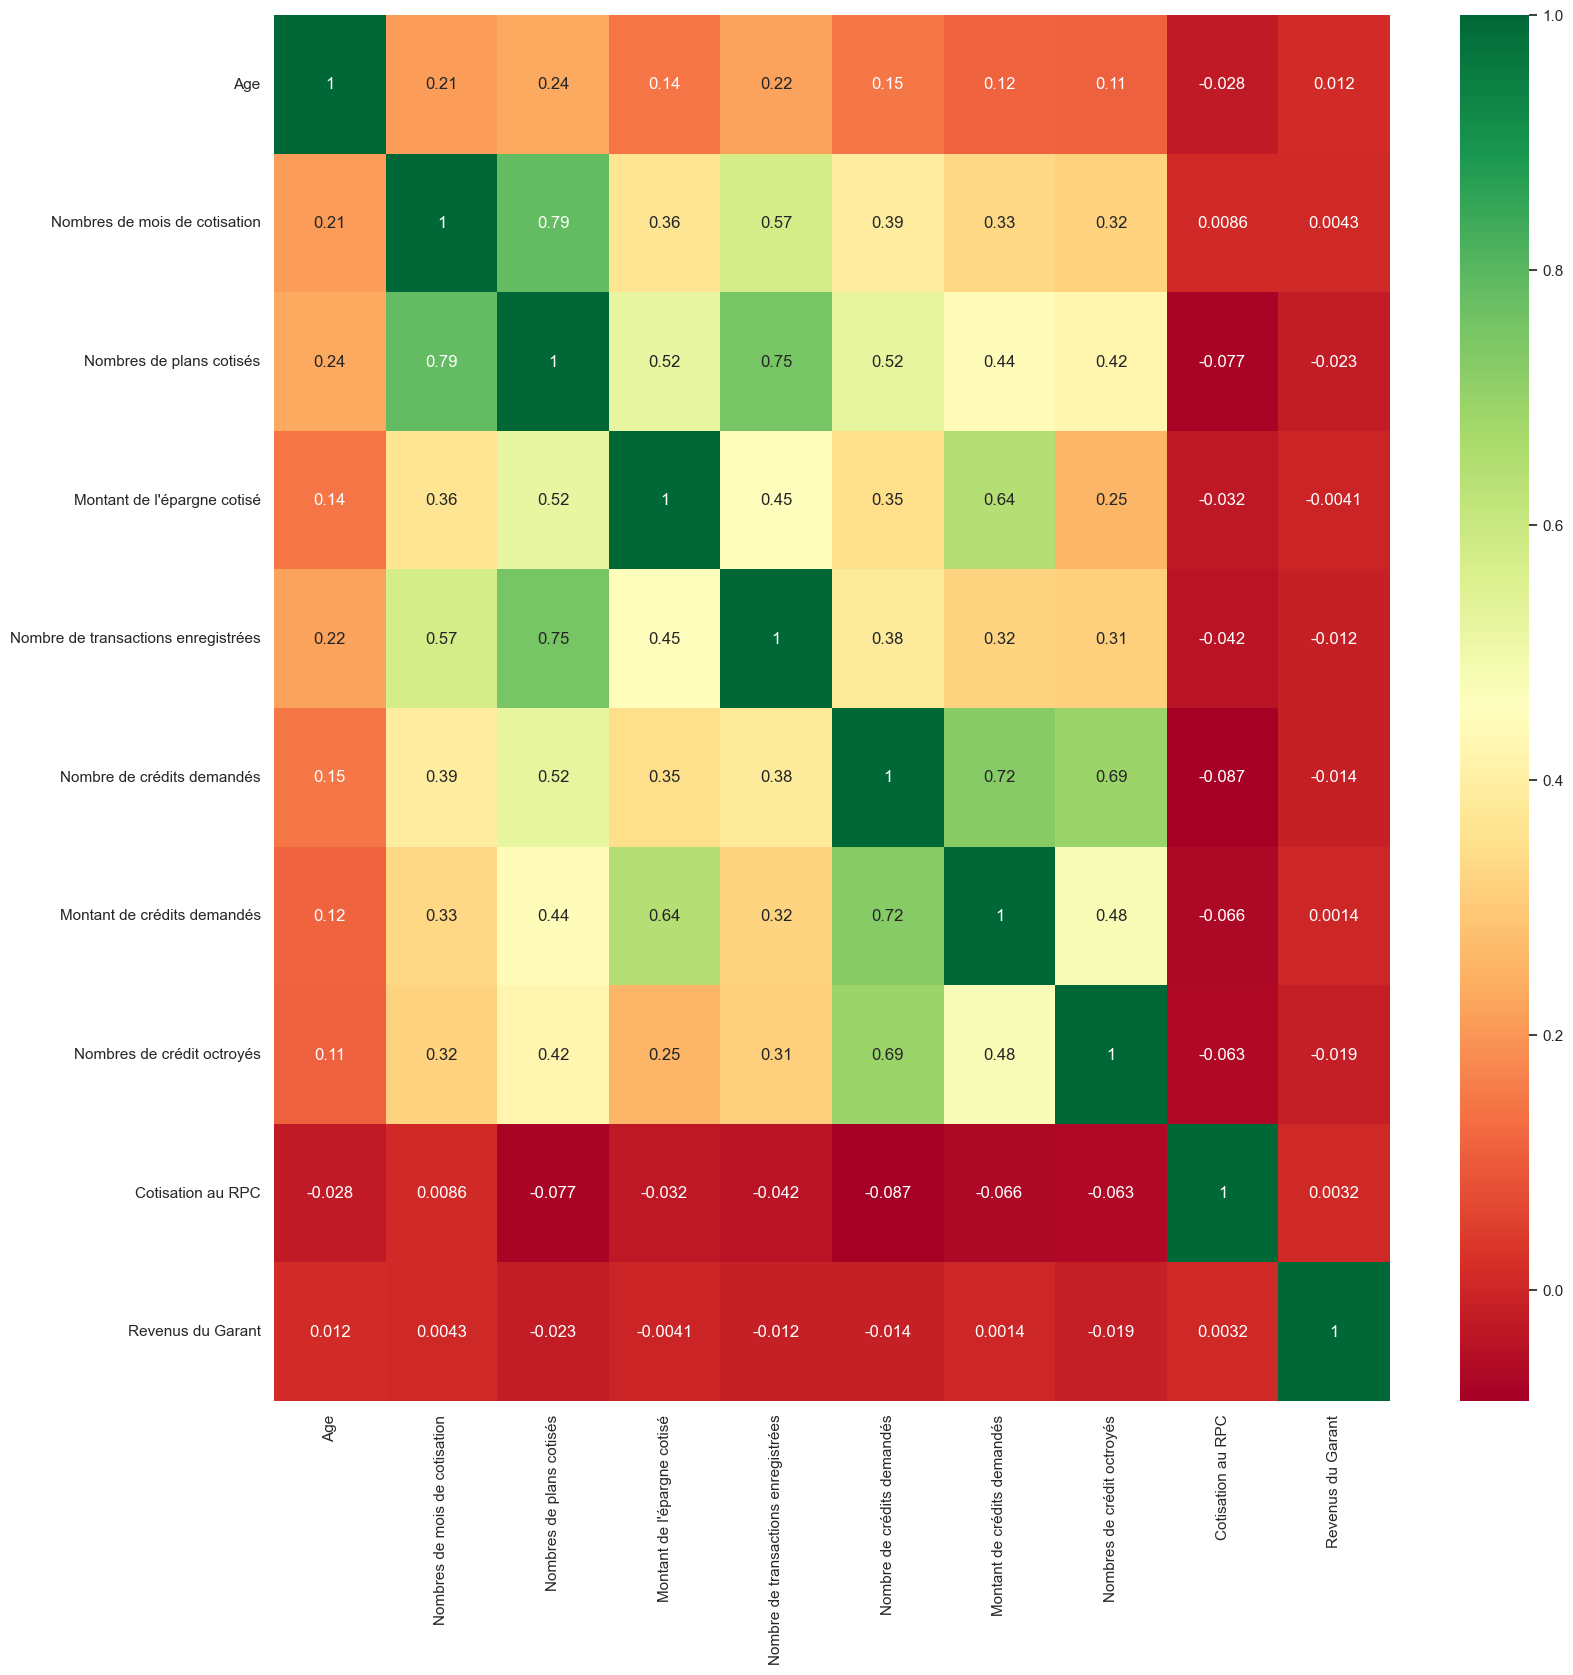

In [16]:
plt.figure(figsize=(18,18))
sns.heatmap(df_en.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [17]:
#suppression des autres variables inutiles
df_en = df_en.drop('Montant de crédit accordé', axis=1)
df_en = df_en.drop('Durée moyenne de remboursement', axis = 1)
df_en = df_en.drop('Nombre de crédit remboursés', axis = 1)
df_en = df_en.drop("Emprunt en cours (dispose t il d'emprunts en cours)", axis = 1)

KeyError: "['Montant de crédit accordé'] not found in axis"

In [ ]:
# Tracé de la nouvelle matrice de confusion

plt.figure(figsize=(18,18))
sns.heatmap(df_en.corr(),annot=True,cmap='RdYlGn')

plt.show()

# Enregistrement du fichier tronqué

In [18]:
df.fillna(df.mean(), inplace = True) #remplacer les nan par la moyenne

df = df.drop('Montant de crédit accordé', axis=1)
df = df.drop('Durée moyenne de remboursement', axis = 1)
df = df.drop('Nombre de crédit remboursés', axis = 1)
df = df.drop("Emprunt en cours (dispose t il d'emprunts en cours)", axis = 1)
df = df.drop('Type de compte', axis=1)
df = df.drop('ID Client',axis=1)
df = df.drop('Date de création',axis=1)
df = df.drop( "Nombres d'années passées à cette addresse " ,axis=1)
df = df.drop('Nombre de crédits octroyés', axis = 1)

df.to_excel('données_tronquees.xlsx', index = False)

KeyError: "['Montant de crédit accordé'] not found in axis"

In [19]:
df

,Agence de rattachement,Sexe,Age,Situation Matrimoniale,Occupation/profession,Nombres de mois de cotisation,Nombres de plans cotisés,Nombre de plans cotisés à terme,Montant de l'épargne cotisé,Nombre de transactions enregistrées,Nombre de crédits demandés,Montant de crédits demandés,Secteur d'activité économique du crédit demandé,Sous Secteur d'activité économique du crédit demandé,Nombres de crédit octroyés,Cotisation au RPC,Cautionnement signé,Revenus du Garant
0,A234,M,45.0,Marié,Commerce,32.789101,2,1,350000,32,1,500000.0,COMMERCE,Formel,1,1.0,Oui,150000.0
1,A332,M,32.0,Marié,Commerce,32.789101,2,1,126000,13,1,1000000.0,COMMERCE,Informel,0,1.0,Oui,120000.0
2,A348,M,51.0,Marié,Commerce,32.789101,4,2,410000,16,1,500000.0,COMMERCE,Formel,1,1.0,Oui,200000.0
3,A344,M,33.0,Marié,Commerce,32.789101,3,3,93000,15,1,250000.0,COMMERCE,Informel,0,1.0,Oui,150000.0
4,A344,M,44.0,Marié,Commerce,32.789101,3,2,258000,43,1,500000.0,COMMERCE,Informel,0,1.0,Oui,156000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,A300,M,46.0,Marié,Commerce,50.000000,52,24,2889000,469,2,1000000.0,COMMERCE,Informel,2,1.0,Non,150000.0
4953,A353,M,53.0,Marié,Commerce,50.000000,51,47,1491000,321,3,850000.0,COMMERCE,Formel,3,1.0,Non,150000.0
4954,A353,F,30.0,Marié,Commerce,49.000000,50,46,7297000,576,4,3000000.0,COMMERCE,Formel,4,1.0,Non,150000.0
4955,A353,F,41.0,Veuf,Beauté,48.000000,64,53,8722500,952,1,1000000.0,COMMERCE,Formel,0,1.0,Oui,200000.0


# Encodage des variables catégorielles

In [20]:
encoder = LabelEncoder()

categorical = ['Agence de rattachement','Sexe ', 'Situation Matrimoniale', 'Occupation/profession', 'Type de compte', "Secteur d'activité économique du crédit demandé", "Sous Secteur d'activité économique du crédit demandé", 'Cautionnement signé']

for feature in categorical:
    df_en[feature] = encoder.fit_transform(df_en[feature])

df_en.head()

KeyError: 'Type de compte'

In [21]:
#accéder aux catégories originelles des variables codées
label_encoder = {}

for col in Variables_catégorielles:
    le = LabelEncoder()
    df_en[col] = le.fit_transform(df_en[col])
    label_encoder[col] = le 
    
for col, le in label_encoder.items():
    print(f"Variable : {col}")
    print(f"Catégories originales : {le.classes_}")
    print(f"Valeurs codées : {le.transform(le.classes_)}")
    print("\n")
    
    

KeyError: 'Type de compte'

# Normalisation des données

In [22]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

for i in [df_en.columns]:
    df_en[i] = scaler.fit_transform(df_en[i])
    

df_en.describe(include = "all")

ValueError: could not convert string to float: ' COMMERCE '

In [23]:
df_en.fillna(df_en.mean(), inplace = True) #remplacer les nan par la moyenne


In [24]:
df_en

,Agence de rattachement,Sexe,Age,Situation Matrimoniale,Occupation/profession,Nombres de mois de cotisation,Nombres de plans cotisés,Nombre de plans cotisés à terme,Montant de l'épargne cotisé,Nombre de transactions enregistrées,Nombre de crédits demandés,Montant de crédits demandés,Secteur d'activité économique du crédit demandé,Sous Secteur d'activité économique du crédit demandé,Nombres de crédit octroyés,Cotisation au RPC,Cautionnement signé,Revenus du Garant
0,2,1,45.0,3,4,32.789101,2,1,350000,32,1,500000.0,COMMERCE,Formel,1,1.0,Oui,150000.0
1,46,1,32.0,3,4,32.789101,2,1,126000,13,1,1000000.0,COMMERCE,Informel,0,1.0,Oui,120000.0
2,58,1,51.0,3,4,32.789101,4,2,410000,16,1,500000.0,COMMERCE,Formel,1,1.0,Oui,200000.0
3,55,1,33.0,3,4,32.789101,3,3,93000,15,1,250000.0,COMMERCE,Informel,0,1.0,Oui,150000.0
4,55,1,44.0,3,4,32.789101,3,2,258000,43,1,500000.0,COMMERCE,Informel,0,1.0,Oui,156000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4952,25,1,46.0,3,4,50.000000,52,24,2889000,469,2,1000000.0,COMMERCE,Informel,2,1.0,Non,150000.0
4953,63,1,53.0,3,4,50.000000,51,47,1491000,321,3,850000.0,COMMERCE,Formel,3,1.0,Non,150000.0
4954,63,0,30.0,3,4,49.000000,50,46,7297000,576,4,3000000.0,COMMERCE,Formel,4,1.0,Non,150000.0
4955,63,0,41.0,4,3,48.000000,64,53,8722500,952,1,1000000.0,COMMERCE,Formel,0,1.0,Oui,200000.0


In [25]:
df_en = df_en.drop('Type de compte', axis=1)
plt.figure(figsize=(18,18))
sns.heatmap(df_en.corr(),annot=True,cmap='RdYlGn')

plt.show()

KeyError: "['Type de compte'] not found in axis"

In [26]:
# Enregistrement de la dataframe normalisée
df_en.to_excel('donnees_final.xlsx', index=False)

# Modélisation

In [27]:
from sklearn.decomposition import PCA   #importation de la bibliothèque nécessaire à l'implémentation de l'ACP
from sklearn.cluster import KMeans    #importation de la bibliothèque nécessaire à l'implémentation du KMeans

In [28]:
# Créons et ajustons le modèle K-means avec 3 clusters
kmeans = KMeans(n_clusters = 3, init = 'k-means++', max_iter = 300, random_state = 0)
kmeans.fit(df_en)

ValueError: could not convert string to float: ' COMMERCE '

In [ ]:
# coordonnées des centroides des clusters
centroids = kmeans.cluster_centers_

In [ ]:
#application pca pour réduire la dimension à 2 composantes principales
pca = PCA(n_components = 2)
principal_components = pca.fit_transform(df_en)

In [ ]:
#ajouter les étiquettes de cluster en tant que colonne au dataframe
df_en['cluster_label'] = kmeans.labels_

In [ ]:
#graphique de dispersion
#utilisation de seaborn pour créer un graphique de dispersion
sns.scatterplot(x=principal_components[:, 0], y=principal_components[:, 1], hue=df_en['cluster_label'], palette = 'viridis')

#tracé des centroides
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker = 'x', s=100)

#legendes et titres
plt.legend(title = 'Cluster')
plt.title('Visualisation des 3 clusters avec pca')
plt.show()

# Recherche du nombre optimal de clusters


In [29]:
#installation de yellow_brick
!pip install -U yellowbrick

   ---------------------------------------- 14.9/14.9 MB 7.1 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
daal4py 2021.6.0 requires daal==2021.4.0, which is not installed.
numba 0.55.1 requires numpy<1.22,>=1.18, but you have numpy 1.24.4 which is incompatible.

[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


# Méthode du coude

In [30]:
#methode du coude
from yellowbrick.cluster import KElbowVisualizer

Kmoy = KMeans(random_state = 0)

visualizer = KElbowVisualizer(Kmoy, k = (1, 12))
visualizer.fit(principal_components)
visualizer.show()


NameError: name 'principal_components' is not defined

# Analyse des résultats de la segmentation


In [ ]:
#ajouter les étiquettes de cluster en tant que colonne au dataframe tronqué
df['cluster_label'] = kmeans.labels_
df['cluster_label'].unique()

In [ ]:
# centroides
features = ['Nombres de mois de cotisation', 'Nombres de plans cotisés', 'Nombre de plans cotisés à terme', "Montant de l'épargne cotisé", 'Nombre de transactions enregistrées', 'Nombre de crédits demandés', 'Age', 'Montant de crédits demandés', 'Cotisation au RPC', 'Revenus du Garant']
df.groupby('cluster_label')[features].mean()

In [ ]:
groupes = df.groupby(['cluster_label', 'Occupation/profession'])[features].mean()
groupes